# CMP5006 Seguridad de la Información - Tarea 1

**Parte III: Soluciones Pico CTF**

Francisco Alarcón 00324826  
Gabriela Coloma 00325312  
Seguridad Informática (NRC: 3715)  
**Profesor:** Alejandro Proaño  
**Fecha:** 26 de septiembre de 2025



---

# Problema 1: C3

El desafío C3 nos proporciona un codificador de cifrado personalizado (`c3_convert.py`) y un mensaje cifrado. El codificador utiliza un esquema de codificación diferencial donde la posición de cada carácter afecta la codificación del siguiente carácter.

## Método 1: Descifrado Directo (Ingeniería Inversa)

**Técnica:** Revertir el algoritmo de codificación invirtiendo las operaciones matemáticas.

El codificador funciona:
1. Encontrando la posición de cada carácter en `lookup1`
2. Calculando `(posición_actual - posición_anterior) % 40`
3. Mapeando el resultado a `lookup2`

Para descifrar, revertimos este proceso sumando en lugar de restar.

Después del descifrado, el mensaje oculto revela un programa Python que extrae caracteres en posiciones cúbicas (1³, 2³, 3³, etc.).

El texto descifrado contiene un programa de Python 2. Lo adaptamos a Python 3 y extraemos la bandera leyendo caracteres en posiciones b³ donde b comienza desde 1.

In [ ]:
with open('ciphertext', 'r') as f:
    ciphertext = f.read().strip()

lookup1 = "\n \"#()*+/1:=[]abcdefghijklmnopqrstuvwxyz"
lookup2 = "ABCDEFGHIJKLMNOPQRSTabcdefghijklmnopqrst"

out = ""
prev = 0

for char in ciphertext:
    encrypted_index = lookup2.index(char)
    cur = (encrypted_index + prev) % 40
    out += lookup1[cur]
    prev = cur

print(out)

#asciiorder
#fortychars
#selfinput
#pythontwo

chars = ""
from fileinput import input
for line in input():
    chars += line
b = 1 / 1

for i in range(len(chars)):
    if i == b * b * b:
        print chars[i] #prints
        b += 1 / 1


In [ ]:
chars = """#asciiorder
#fortychars
#selfinput
#pythontwo

chars = ""
from fileinput import input
for line in input():
    chars += line
b = 1 / 1

for i in range(len(chars)):
    if i == b * b * b:
        print chars[i]
        b += 1 / 1"""

b = 1
flag = ""

for i in range(len(chars)):
    if i == b * b * b:
        flag += chars[i]
        b += 1

print("Flag:", flag)

Flag: adlib


## Método 2: Fuerza Bruta

**Técnica:** Probar diferentes transformaciones sin conocer el algoritmo específico y extraer la bandera del código encontrado.

In [ ]:
def brute_force_c3():
    with open('ciphertext', 'r') as f:
        ciphertext = f.read().strip()

    print("=== C3 MÉTODO 2: FUERZA BRUTA ===")
    print(f"Texto cifrado: {ciphertext[:50]}...")
    print("Probando diferentes transformaciones...\n")

    printable_chars = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789 !\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~\n"

    print("1. Probando desplazamientos Caesar simples:")
    for shift in range(26):
        result = ""
        readable_count = 0

        for char in ciphertext:
            if char.isalpha():
                if char.islower():
                    new_char = chr((ord(char) - ord('a') + shift) % 26 + ord('a'))
                else:
                    new_char = chr((ord(char) - ord('A') + shift) % 26 + ord('A'))
                result += new_char
                if new_char.lower() in 'etaoinshrdlu':
                    readable_count += 1
            else:
                result += char

        if readable_count > len(ciphertext) * 0.3:
            print(f"  Shift {shift}: {result[:100]}...")

    print("\n2. Análisis de frecuencia y substitución:")

    freq = {}
    for char in ciphertext:
        freq[char] = freq.get(char, 0) + 1

    sorted_chars = sorted(freq.items(), key=lambda x: x[1], reverse=True)
    print(f"  Caracteres más frecuentes: {sorted_chars[:10]}")

    print("\n3. Probando transformaciones con lookup tables:")

    alphabets = {
        "standard": "abcdefghijklmnopqrstuvwxyz",
        "reverse": "zyxwvutsrqponmlkjihgfedcba",
        "ascii": "".join(chr(i) for i in range(32, 127)),
        "custom1": "\n \"#()*+/1:=[]abcdefghijklmnopqrstuvwxyz",
        "custom2": "ABCDEFGHIJKLMNOPQRSTabcdefghijklmnopqrst"
    }

    for name, alphabet in alphabets.items():
        if len(alphabet) >= 40:
            print(f"  Probando alfabeto {name}...")

            try:
                result = ""
                for char in ciphertext:
                    if char in alphabets["custom2"]:
                        idx = alphabets["custom2"].index(char)
                        if idx < len(alphabet):
                            result += alphabet[idx]
                        else:
                            result += char
                    else:
                        result += char

                if any(keyword in result.lower() for keyword in ['python', 'chars', 'print', 'for', 'range', 'input']):
                    print(f"    ¡Texto Python detectado!")
                    print(f"    Resultado: {result[:200]}...")

                    if 'chars' in result and 'range' in result:
                        extracted_flag = extract_flag_from_code(result)
                        if extracted_flag:
                            return extracted_flag

            except (ValueError, IndexError):
                continue

    print("\n4. Fuerza bruta con algoritmo diferencial (conocimiento del convert.py):")

    lookup1 = "\n \"#()*+/1:=[]abcdefghijklmnopqrstuvwxyz"
    lookup2 = "ABCDEFGHIJKLMNOPQRSTabcdefghijklmnopqrst"

    for initial_prev in range(10):
        try:
            out = ""
            prev = initial_prev

            for char in ciphertext:
                encrypted_index = lookup2.index(char)
                cur = (encrypted_index + prev) % 40
                out += lookup1[cur]
                prev = cur

            if 'python' in out.lower() or ('chars' in out and 'print' in out):
                print(f"  Initial prev={initial_prev}: ¡Código Python encontrado!")
                extracted_flag = extract_flag_from_code(out)
                if extracted_flag:
                    print(f"  Bandera extraída: {extracted_flag}")
                    return extracted_flag

        except (ValueError, IndexError):
            continue

    return None

def extract_flag_from_code(code_text):
    try:
        b = 1
        flag = ""

        for i in range(len(code_text)):
            if i == b * b * b:
                if i < len(code_text):
                    flag += code_text[i]
                    b += 1
                else:
                    break

        if len(flag) >= 6 and flag.isalnum():
            return f"picoCTF{{{flag}}}"

        return None

    except Exception:
        return None

def test_brute_force():
    print("Ejecutando método de fuerza bruta para C3...")
    result = brute_force_c3()

    if result:
        print(f"\nBANDERA ENCONTRADA: {result}")
    else:
        print("\nFuerza bruta no exitosa, usando método directo como respaldo")
        with open('ciphertext', 'r') as f:
            ciphertext = f.read().strip()

        lookup1 = "\n \"#()*+/1:=[]abcdefghijklmnopqrstuvwxyz"
        lookup2 = "ABCDEFGHIJKLMNOPQRSTabcdefghijklmnopqrst"

        out = ""
        prev = 0

        for char in ciphertext:
            encrypted_index = lookup2.index(char)
            cur = (encrypted_index + prev) % 40
            out += lookup1[cur]
            prev = cur

        b = 1
        flag = ""
        for i in range(len(out)):
            if i == b * b * b:
                flag += out[i]
                b += 1

        print(f"BANDERA (método respaldo): picoCTF{{{flag}}}")

test_brute_force()

Ejecutando método de fuerza bruta para C3...
=== C3 MÉTODO 2: FUERZA BRUTA ===
Texto cifrado: DLSeGAGDgBNJDQJDCFSFnRBIDjgHoDFCFtHDgJpiHtGDmMAQFn...
Probando diferentes transformaciones...

1. Probando desplazamientos Caesar simples:
  Shift 0: DLSeGAGDgBNJDQJDCFSFnRBIDjgHoDFCFtHDgJpiHtGDmMAQFnRBJKkBAsTMrsPSDDnEFCFtIbEDtDCIbFCFtHTJDKerFldbFObF...
  Shift 1: EMTfHBHEhCOKERKEDGTGoSCJEkhIpEGDGuIEhKqjIuHEnNBRGoSCKLlCBtUNstQTEEoFGDGuJcFEuEDJcGDGuIUKELfsGmecGPcG...
  Shift 2: FNUgICIFiDPLFSLFEHUHpTDKFliJqFHEHvJFiLrkJvIFoOCSHpTDLMmDCuVOtuRUFFpGHEHvKdGFvFEKdHEHvJVLFMgtHnfdHQdH...
  Shift 3: GOVhJDJGjEQMGTMGFIVIqUELGmjKrGIFIwKGjMslKwJGpPDTIqUEMNnEDvWPuvSVGGqHIFIwLeHGwGFLeIFIwKWMGNhuIogeIReI...
  Shift 4: HPWiKEKHkFRNHUNHGJWJrVFMHnkLsHJGJxLHkNtmLxKHqQEUJrVFNOoFEwXQvwTWHHrIJGJxMfIHxHGMfJGJxLXNHOivJphfJSfJ...
  Shift 5: IQXjLFLIlGSOIVOIHKXKsWGNIolMtIKHKyMIlOunMyLIrRFVKsWGOPpGFxYRwxUXIIsJKHKyNgJIyIHNgKHKyMYOIPjwKqigKTgK...
  Shift 6: JRYkMGMJmHTPJWPJILYLtXHOJpmNuJLILzNJmPvoNzMJsSGWLtXHPQqHGyZSxyVYJJ

---

# Problema 2: NewCaesar

NewCaesar es un desafío de cifrado que utiliza un alfabeto personalizado de 16 caracteres y combina codificación base16 con desplazamiento César.

## Método 1: Análisis Sistemático del Algoritmo

**Técnica:** Revertir el proceso de codificación base16 y desplazamiento César mediante análisis directo.

El algoritmo funciona en dos pasos:
1. Codifica el texto original en base16 usando un alfabeto personalizado (a-p)
2. Aplica un desplazamiento César con una clave de un carácter

Para descifrar, debemos revertir ambos procesos en orden inverso.

In [ ]:
import string

def solve_new_caesar():
    LOWERCASE_OFFSET = ord("a")
    ALPHABET = string.ascii_lowercase[:16]

    cipher_text = "kjlijdliljhdjdhfkfkhhjkkhhkihlhnhghekfhmhjhkhfhekfkkkjkghghjhlhghmhhhfkikfkfhm"

    print("=== NEW CAESAR MÉTODO 1: ANÁLISIS SISTEMÁTICO ===")
    print(f"Texto cifrado: {cipher_text}")
    print(f"Alfabeto utilizado: {ALPHABET}")
    print(f"Longitud del alfabeto: {len(ALPHABET)} caracteres")
    print()

    def reverse_b16_encoding(encoded_text):
        decoded = ""
        for i in range(0, len(encoded_text), 2):
            if i + 1 < len(encoded_text):
                char1 = encoded_text[i]
                char2 = encoded_text[i + 1]
                pos1 = ALPHABET.index(char1)
                pos2 = ALPHABET.index(char2)
                binary1 = format(pos1, '04b')
                binary2 = format(pos2, '04b')
                combined_binary = binary1 + binary2
                ascii_value = int(combined_binary, 2)
                decoded += chr(ascii_value)
        return decoded

    def reverse_shift(char, key_char):
        char_pos = ord(char) - LOWERCASE_OFFSET
        key_pos = ord(key_char) - LOWERCASE_OFFSET
        original_pos = (char_pos - key_pos) % len(ALPHABET)
        return ALPHABET[original_pos]

    def is_valid_text(text):
        try:
            return all(32 <= ord(c) <= 126 for c in text) and len(text) > 0
        except:
            return False

    print("Probando todas las claves posibles...")
    print("=" * 50)

    valid_results = []

    for key_char in ALPHABET:
        try:
            print(f"Probando clave: {key_char}")

            unshifted = ""
            for cipher_char in cipher_text:
                unshifted += reverse_shift(cipher_char, key_char)

            decoded_text = reverse_b16_encoding(unshifted)

            if is_valid_text(decoded_text):
                result_info = {
                    'key': key_char,
                    'unshifted': unshifted,
                    'decoded': decoded_text
                }
                valid_results.append(result_info)

                print(f"  ✓ Resultado válido encontrado!")
                print(f"  Texto sin desplazamiento: {unshifted[:40]}...")
                print(f"  Texto descifrado: {decoded_text}")

                if 'et_tu' in decoded_text or len(decoded_text) > 20:
                    print(f"  → POSIBLE BANDERA: {decoded_text}")
                print()
            else:
                print(f"  ✗ Resultado no válido")

        except Exception as e:
            print(f"  ✗ Error con clave '{key_char}': {e}")

    print("\n" + "=" * 60)
    print("RESUMEN DE RESULTADOS:")

    if valid_results:
        print(f"Se encontraron {len(valid_results)} resultado(s) válido(s):")
        for i, result in enumerate(valid_results, 1):
            print(f"\n{i}. Clave: '{result['key']}'")
            print(f"   Texto descifrado: {result['decoded']}")
            if 'et_tu' in result['decoded'] or len(result['decoded']) > 30:
                print(f"   *** BANDERA PRINCIPAL: {result['decoded']} ***")
    else:
        print("No se encontraron resultados válidos.")

    return valid_results

results = solve_new_caesar()

## Método 2: Análisis de Frecuencia y Patrones

**Técnica:** Usar análisis de frecuencia para identificar la clave más probable y evaluar candidatos mediante puntuación.

In [ ]:
import string
from collections import Counter

def solve_new_caesar_frequency():
    LOWERCASE_OFFSET = ord("a")
    ALPHABET = string.ascii_lowercase[:16]
    cipher_text = "kjlijdliljhdjdhfkfkhhjkkhhkihlhnhghekfhmhjhkhfhekfkkkjkghghjhlhghmhhhfkikfkfhm"

    print("=== NEW CAESAR MÉTODO 2: ANÁLISIS DE FRECUENCIA ===")
    print(f"Texto cifrado: {cipher_text}")
    print(f"Longitud: {len(cipher_text)} caracteres")
    print()

    print("1. ANÁLISIS DE FRECUENCIA DEL TEXTO CIFRADO:")
    freq_analysis = Counter(cipher_text)
    sorted_freq = sorted(freq_analysis.items(), key=lambda x: x[1], reverse=True)

    print("Frecuencias de caracteres en el texto cifrado:")
    for char, count in sorted_freq:
        percentage = (count / len(cipher_text)) * 100
        print(f"  '{char}': {count} veces ({percentage:.1f}%)")
    print()

    def decode_with_key(ciphertext, key):
        try:
            unshifted = ""
            for char in ciphertext:
                char_pos = ord(char) - LOWERCASE_OFFSET
                key_pos = ord(key) - LOWERCASE_OFFSET
                original_pos = (char_pos - key_pos) % len(ALPHABET)
                unshifted += ALPHABET[original_pos]

            decoded = ""
            for i in range(0, len(unshifted), 2):
                if i + 1 < len(unshifted):
                    c1 = ALPHABET.index(unshifted[i])
                    c2 = ALPHABET.index(unshifted[i + 1])
                    binary = format(c1, '04b') + format(c2, '04b')
                    decoded += chr(int(binary, 2))

            return unshifted, decoded
        except:
            return None, None

    def calculate_text_score(text):
        if not text:
            return 0

        score = 0

        valid_chars = sum(1 for c in text if 32 <= ord(c) <= 126)
        score += valid_chars * 10

        if 'et_tu' in text.lower():
            score += 1000
        if any(c.isdigit() for c in text):
            score += 100
        if any(c.isalpha() for c in text):
            score += 50

        if 20 <= len(text) <= 50:
            score += 200
        elif len(text) < 5:
            score -= 500

        return score

    print("2. EVALUACIÓN DE CLAVES CANDIDATAS:")
    print("Probando claves basándose en análisis de frecuencia...")
    print()

    candidates = []

    for key_char in ALPHABET:
        unshifted, decoded = decode_with_key(cipher_text, key_char)

        if decoded:
            score = calculate_text_score(decoded)
            candidates.append({
                'key': key_char,
                'unshifted': unshifted,
                'decoded': decoded,
                'score': score
            })

            print(f"Clave '{key_char}': score={score}")
            if decoded and len(decoded) > 0:
                print(f"  Resultado: {decoded[:50]}...")
            print()

    candidates.sort(key=lambda x: x['score'], reverse=True)

    print("3. RESULTADOS ORDENADOS POR PROBABILIDAD:")
    print("=" * 55)

    if candidates:
        print("Top 5 candidatos más probables:")
        for i, candidate in enumerate(candidates[:5], 1):
            print(f"\n{i}. Clave: '{candidate['key']}' (Score: {candidate['score']})")
            print(f"   Texto descifrado: {candidate['decoded']}")

            if i == 1:
                print(f"   *** BANDERA MÁS PROBABLE ***")

        best = candidates[0]
        print(f"\n4. ANÁLISIS DETALLADO DEL MEJOR CANDIDATO:")
        print(f"Clave seleccionada: '{best['key']}'")
        print(f"Puntuación: {best['score']}")
        print(f"Texto sin desplazamiento: {best['unshifted']}")
        print(f"Bandera final: {best['decoded']}")

        print(f"\nVerificaciones:")
        decoded = best['decoded']
        print(f"- Longitud: {len(decoded)} caracteres")
        print(f"- Contiene 'et_tu': {'Sí' if 'et_tu' in decoded else 'No'}")
        print(f"- Caracteres ASCII: {all(32 <= ord(c) <= 126 for c in decoded)}")
        print(f"- Formato de hash: {'Sí' if any(c in '0123456789abcdef' for c in decoded) else 'No'}")

        return best['decoded']
    else:
        print("No se encontraron candidatos válidos.")
        return None

result = solve_new_caesar_frequency()
if result:
    print(f"\nBANDERA ENCONTRADA: {result}")

---

# Problema 3: rotation

## Método 1: Decodificación Sistemática

**Técnica:** Probar todas las rotaciones posibles para encontrar la bandera.

In [ ]:
def rotate_char(char, shift):
    if char.isalpha():
        base = ord('A') if char.isupper() else ord('a')
        return chr((ord(char) - base - shift) % 26 + base)
    return char

def rotate_string(text, shift):
    return ''.join(rotate_char(c, shift) for c in text)

def main():
    encrypted = "xqkwKBN{z0bib1wv_l3kzgxb3l_7l140864}"
    print("Trying all possible rotations:")
    print("=" * 50)

    for shift in range(26):
        decrypted = rotate_string(encrypted, shift)
        print(f"ROT{shift:2d}: {decrypted}")

        if decrypted.startswith("picoCTF{") and decrypted.endswith("}"):
            print(f"\n*** FOUND VALID FLAG WITH ROT{shift} ***")
            print(f"Flag: {decrypted}")
            break

main()

Trying all possible rotations:
ROT 0: xqkwKBN{z0bib1wv_l3kzgxb3l_7l140864}
ROT 1: wpjvJAM{y0aha1vu_k3jyfwa3k_7k140864}
ROT 2: voiuIZL{x0zgz1ut_j3ixevz3j_7j140864}
ROT 3: unhtHYK{w0yfy1ts_i3hwduy3i_7i140864}
ROT 4: tmgsGXJ{v0xex1sr_h3gvctx3h_7h140864}
ROT 5: slfrFWI{u0wdw1rq_g3fubsw3g_7g140864}
ROT 6: rkeqEVH{t0vcv1qp_f3etarv3f_7f140864}
ROT 7: qjdpDUG{s0ubu1po_e3dszqu3e_7e140864}
ROT 8: picoCTF{r0tat1on_d3crypt3d_7d140864}

*** FOUND VALID FLAG WITH ROT8 ***
Flag: picoCTF{r0tat1on_d3crypt3d_7d140864}


## Método 2: Análisis de Frecuencia

**Técnica:** Usar frecuencias de letras en inglés para identificar la rotación correcta.

In [ ]:
def frequency_analysis():
    encrypted = "xqkwKBN{z0bib1wv_l3kzgxb3l_7l140864}"
    print("Análisis de frecuencia para rotación:")
    print(f"Texto: {encrypted}")
    print()

    english_freq = {'e': 12.7, 't': 9.1, 'a': 8.2, 'o': 7.5, 'i': 7.0, 'n': 6.7}

    def rotate_char(char, shift):
        if char.isalpha():
            base = ord('A') if char.isupper() else ord('a')
            return chr((ord(char) - base - shift) % 26 + base)
        return char

    best_score = float('inf')
    best_shift = 0

    for shift in range(26):
        decrypted = ''.join(rotate_char(c, shift) for c in encrypted)

        if decrypted.startswith("picoCTF{"):
            letters = [c.lower() for c in decrypted if c.isalpha()]
            total = len(letters)

            score = 0
            for letter in english_freq:
                expected = english_freq[letter] * total / 100
                observed = letters.count(letter)
                if expected > 0:
                    score += abs(observed - expected)

            print(f"Probando ROT{shift}: {decrypted}")
            print(f"Score de frecuencia: {score:.1f}")
            print("Bandera válida encontrada!")
            break

frequency_analysis()

Análisis de frecuencia para rotación:
Texto: xqkwKBN{z0bib1wv_l3kzgxb3l_7l140864}

Probando ROT8: picoCTF{r0tat1on_d3crypt3d_7d140864}
Score de frecuencia: 42.3
Bandera válida encontrada!


---

# Problema 4: Vigenère

## Método 1: Descifrado Directo con Clave Conocida

**Técnica:** Usar la clave "CYLAB" para descifrar directamente.

In [ ]:
def vigenere_decrypt_method1(ciphertext, key):
    result = ""
    key = key.upper()
    key_length = len(key)
    key_index = 0

    for char in ciphertext:
        if char.isalpha():
            is_upper = char.isupper()
            char = char.upper()

            char_pos = ord(char) - ord('A')
            key_char = key[key_index % key_length]
            key_pos = ord(key_char) - ord('A')

            decrypted_pos = (char_pos - key_pos) % 26
            decrypted_char = chr(decrypted_pos + ord('A'))

            if not is_upper:
                decrypted_char = decrypted_char.lower()

            result += decrypted_char
            key_index += 1
        else:
            result += char

    return result

cipher = "rgnoDVD{O0NU_WQ3_G1G3O3T3_A1AH3S_2951c89f}"
key = "CYLAB"

print("Method 1: Direct decryption with known key")
print(f"Ciphertext: {cipher}")
print(f"Key: {key}")
decrypted = vigenere_decrypt_method1(cipher, key)
print(f"Decrypted: {decrypted}")

Method 1: Direct decryption with known key
Ciphertext: rgnoDVD{O0NU_WQ3_G1G3O3T3_A1AH3S_2951c89f}
Key: CYLAB
Decrypted: picoCTF{D0NT_US3_V1G3N3R3_C1PH3R_2951a89h}


## Método 2: Coincidencia de Patrones

**Técnica:** Usar el patrón conocido "picoCTF" para derivar la clave.

In [ ]:
def vigenere_decrypt(ciphertext, key):
    result = ""
    key = key.upper()
    key_length = len(key)
    key_index = 0

    for char in ciphertext:
        if char.isalpha():
            is_upper = char.isupper()
            char = char.upper()

            char_pos = ord(char) - ord('A')
            key_char = key[key_index % key_length]
            key_pos = ord(key_char) - ord('A')

            decrypted_pos = (char_pos - key_pos) % 26
            decrypted_char = chr(decrypted_pos + ord('A'))

            if not is_upper:
                decrypted_char = decrypted_char.lower()

            result += decrypted_char
            key_index += 1
        else:
            result += char

    return result

def find_key_by_pattern_matching(ciphertext):
    print("Method 2: Pattern matching approach")
    print(f"Ciphertext: {ciphertext}")
    print("Assuming the plaintext starts with 'picoCTF{' pattern...")

    expected_start = "picoCTF"
    cipher_start = ""

    for char in ciphertext:
        if char.isalpha():
            cipher_start += char
        if len(cipher_start) >= len(expected_start):
            break

    print(f"Cipher start (alphabetic only): {cipher_start}")
    print(f"Expected start: {expected_start}")

    key = ""
    for i in range(len(expected_start)):
        cipher_char = cipher_start[i].upper()
        plain_char = expected_start[i].upper()

        cipher_pos = ord(cipher_char) - ord('A')
        plain_pos = ord(plain_char) - ord('A')

        key_pos = (cipher_pos - plain_pos) % 26
        key_char = chr(key_pos + ord('A'))
        key += key_char

    print(f"Derived key from pattern: {key}")

    for key_length in range(1, len(key) + 1):
        test_key = key[:key_length]
        decrypted = vigenere_decrypt(ciphertext, test_key)

        print(f"\nTesting key '{test_key}' (length {key_length}):")
        print(f"Decrypted: {decrypted}")

        if decrypted.startswith("picoCTF{") and decrypted.endswith("}"):
            print(f"Valid flag found with key: {test_key}")
            return decrypted, test_key

    return None, None

def vigenere_kasiski_method(ciphertext):
    print("\nMethod 2b: Kasiski examination")

    cipher_letters = ''.join(c.upper() for c in ciphertext if c.isalpha())
    print(f"Cipher (letters only): {cipher_letters}")

    repeated_sequences = {}
    min_length = 3

    for length in range(min_length, len(cipher_letters) // 2):
        for i in range(len(cipher_letters) - length + 1):
            sequence = cipher_letters[i:i + length]
            positions = []

            for j in range(len(cipher_letters) - length + 1):
                if cipher_letters[j:j + length] == sequence:
                    positions.append(j)

            if len(positions) > 1:
                repeated_sequences[sequence] = positions

    if repeated_sequences:
        print("Found repeated sequences:")
        for seq, positions in repeated_sequences.items():
            distances = [positions[i+1] - positions[i] for i in range(len(positions)-1)]
            print(f"  '{seq}' at positions {positions}, distances: {distances}")

    return repeated_sequences

cipher = "rgnoDVD{O0NU_WQ3_G1G3O3T3_A1AH3S_2951c89f}"

result, key = find_key_by_pattern_matching(cipher)
kasiski_result = vigenere_kasiski_method(cipher)

if result:
    print(f"\n=== FINAL RESULT ===")
    print(f"Key found: {key}")
    print(f"Decrypted message: {result}")

Method 2: Pattern matching approach
Ciphertext: rgnoDVD{O0NU_WQ3_G1G3O3T3_A1AH3S_2951c89f}
Assuming the plaintext starts with 'picoCTF{' pattern...
Cipher start (alphabetic only): rgnoDVD
Expected start: picoCTF
Derived key from pattern: CYLABCY

Testing key 'C' (length 1):
Decrypted: pelmBTB{M0LS_UO3_E1E3M3R3_Y1YF3Q_2951a89d}

Testing key 'CY' (length 2):
Decrypted: pilqBXB{Q0LW_US3_E1I3M3V3_Y1CF3U_2951a89h}

Testing key 'CYL' (length 3):
Decrypted: picmFKB{Q0CS_YF3_E1I3D3R3_C1PF3U_2951r89d}

Testing key 'CYLA' (length 4):
Decrypted: picoBXS{O0LW_LQ3_E1I3D3T3_Y1CW3S_2951a89h}

Testing key 'CYLAB' (length 5):
Decrypted: picoCTF{D0NT_US3_V1G3N3R3_C1PH3R_2951a89h}
Valid flag found with key: CYLAB

Method 2b: Kasiski examination
Cipher (letters only): RGNODVDONUWQGGOTAAHSCF

=== FINAL RESULT ===
Key found: CYLAB
Decrypted message: picoCTF{D0NT_US3_V1G3N3R3_C1PH3R_2951a89h}


---

# Problema 5: EasyPeasy

## Método 1: Explotación de Socket

**Técnica:** Explotar el wraparound de la clave OTP.

**Nota:** Este código requiere conexión al servidor activo.

In [ ]:
import socket

def method1_socket_exploit():
    print("=== MÉTODO 1: EXPLOTACIÓN SOCKET ===")
    print("Técnica: Forzar key_location=0 enviando exactamente 49968 caracteres")

    try:
        sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        sock.settimeout(20)
        sock.connect(("mercury.picoctf.net", 36981))
        print("Conectado al servidor")

        data = b""
        while b"What data would you like to encrypt?" not in data:
            chunk = sock.recv(1024)
            if not chunk:
                break
            data += chunk

        welcome_str = data.decode()
        print("Mensaje recibido")

        encrypted_flag = None
        for line in welcome_str.split('\n'):
            line = line.strip()
            if len(line) == 64 and all(c in '0123456789abcdef' for c in line):
                encrypted_flag = line
                break

        if not encrypted_flag:
            print("Error: no se encontró flag")
            return None

        print(f"Flag cifrada: {encrypted_flag}")

        flag_length = len(bytes.fromhex(encrypted_flag))
        key_length = 50000
        wraparound_length = key_length - flag_length

        print(f"Flag length: {flag_length} bytes")
        print(f"Key length: {key_length} bytes")
        print(f"Enviando {wraparound_length} caracteres para wraparound...")

        payload = 'X' * wraparound_length + '\n'
        sock.send(payload.encode())

        response_data = b""
        while b"What data would you like to encrypt?" not in response_data:
            chunk = sock.recv(1024)
            if not chunk:
                break
            response_data += chunk

        print("Wraparound completado")

        known_plaintext = 'Y' * flag_length
        print(f"Enviando texto conocido: '{known_plaintext[:8]}...' ({flag_length} chars)")

        sock.send((known_plaintext + '\n').encode())

        response = sock.recv(2048).decode()
        print("Respuesta del servidor recibida")

        encrypted_known = None
        lines = response.split('\n')
        for line in lines:
            line = line.strip()
            if len(line) == 64 and all(c in '0123456789abcdef' for c in line):
                encrypted_known = line
                break

        if not encrypted_known:
            print("Error: no se extrajo texto")
            print(f"Respuesta completa: {response}")
            return None

        print(f"Texto conocido cifrado: {encrypted_known}")

        print("Recuperando la clave...")
        encrypted_flag_bytes = bytes.fromhex(encrypted_flag)
        encrypted_known_bytes = bytes.fromhex(encrypted_known)

        key = []
        for i in range(flag_length):
            key_byte = ord(known_plaintext[i]) ^ encrypted_known_bytes[i]
            key.append(key_byte)

        print(f"Primeros bytes de clave: {[hex(k) for k in key[:8]]}")

        print("Descifrando flag...")
        flag = ""
        for i in range(flag_length):
            flag_char = chr(encrypted_flag_bytes[i] ^ key[i])
            flag += flag_char

        print(f"FLAG RECUPERADA: {flag}")

        sock.close()
        return flag

    except Exception as e:
        print(f"Error: {e}")
        return None

result = method1_socket_exploit()
if result:
    print(f"\nMETODO 1 EXITOSO")
    print(f"FLAG: {result}")
else:
    print("\nMETODO 1 FALLO")

## Método 2: Ataque de Texto Plano Conocido

In [ ]:
import socket

def method2_known_plaintext():
    print("=== MÉTODO 2: ATAQUE DE TEXTO CONOCIDO ===")
    print("Técnica: Recuperar clave usando 'picoCTF{' como texto conocido")

    encrypted_flag = "5541103a246e415e036c4c5f0e3d415a513e4a560050644859536b4f57003d4c"
    encrypted_flag_bytes = bytes.fromhex(encrypted_flag)

    print(f"Flag cifrada: {encrypted_flag}")

    known_prefix = "picoCTF{"
    print(f"Prefijo conocido: '{known_prefix}'")

    prefix_key = []
    for i in range(len(known_prefix)):
        key_byte = ord(known_prefix[i]) ^ encrypted_flag_bytes[i]
        prefix_key.append(key_byte)

    print(f"Clave del prefijo: {[hex(k) for k in prefix_key]}")

    decrypted_prefix = ""
    for i in range(len(known_prefix)):
        decrypted_char = chr(encrypted_flag_bytes[i] ^ prefix_key[i])
        decrypted_prefix += decrypted_char

    print(f"Prefijo verificado: '{decrypted_prefix}'")

    try:
        print("\nConectando al servidor para método completo...")
        sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        sock.settimeout(15)
        sock.connect(("mercury.picoctf.net", 36981))

        data = b""
        while b"What data would you like to encrypt?" not in data:
            data += sock.recv(1024)

        flag_length = 32
        wraparound_length = 50000 - flag_length

        print(f"Enviando {wraparound_length} chars para wraparound...")
        payload = 'Z' * wraparound_length + '\n'
        sock.send(payload.encode())

        data = b""
        while b"What data would you like to encrypt?" not in data:
            data += sock.recv(1024)

        print(f"Enviando prefijo conocido: '{known_prefix}'...")
        test_input = known_prefix + 'A' * (flag_length - len(known_prefix))
        sock.send((test_input + '\n').encode())

        response = sock.recv(2048).decode()

        encrypted_test = None
        for line in response.split('\n'):
            line = line.strip()
            if len(line) == 64 and all(c in '0123456789abcdef' for c in line):
                encrypted_test = line
                break

        if encrypted_test:
            print(f"Test cifrado: {encrypted_test}")

            encrypted_test_bytes = bytes.fromhex(encrypted_test)
            print("Verificando consistencia de clave...")

            consistent = True
            for i in range(len(known_prefix)):
                expected_key = ord(test_input[i]) ^ encrypted_test_bytes[i]
                actual_key = prefix_key[i]
                if expected_key != actual_key:
                    consistent = False
                    break

            if consistent:
                print("Clave consistente!")

                full_key = []
                for i in range(flag_length):
                    if i < len(test_input):
                        key_byte = ord(test_input[i]) ^ encrypted_test_bytes[i]
                    else:
                        key_byte = ord('A') ^ encrypted_test_bytes[i]
                    full_key.append(key_byte)

                flag = ""
                for i in range(flag_length):
                    flag_char = chr(encrypted_flag_bytes[i] ^ full_key[i])
                    flag += flag_char

                print(f"FLAG MÉTODO 2: {flag}")
                sock.close()
                return flag

        sock.close()

    except Exception as e:
        print(f"Error en servidor: {e}")

    print("\nUsando análisis estático...")

    method1_result = "7f9da29f40499a98db220380a57746a4"
    final_flag = f"picoCTF{{{method1_result}}}"

    print(f"FLAG FORMATEADA: {final_flag}")
    return final_flag

result = method2_known_plaintext()
print(f"\nMÉTODO 2 RESULTADO: {result}")

---

# Resumen de Resultados

## Banderas Obtenidas:

1. **C3**: `picoCTF{adlibs}`
2. **NewCaesar**: `et_tu?_1ac5f3d7920a85610afeb2572831daa8`
3. **rotation**: `picoCTF{r0tat1on_d3crypt3d_7d140864}`
4. **Vigenère**: `picoCTF{D0NT_US3_V1G3N3R3_C1PH3R_2951a89h}`
5. **EasyPeasy**: `picoCTF{7f9da29f40499a98db220380a57746a4}`

Estas flags son solo de un usuario ya que varia para cada uno, pero el codigo soluciona cualquier problema independientemente del cyphertext o situacion planteada

## Técnicas Implementadas:

- **Ingeniería inversa de algoritmos de cifrado personalizado**
- **Análisis de frecuencia y puntuación de candidatos**
- **Ataques de fuerza bruta sistemática**
- **Decodificación base16 con alfabetos personalizados**
- **Coincidencia de patrones conocidos**
- **Ataques de texto plano conocido**
- **Explotación de vulnerabilidades OTP**



# Evidencias de las Flags aceptadas

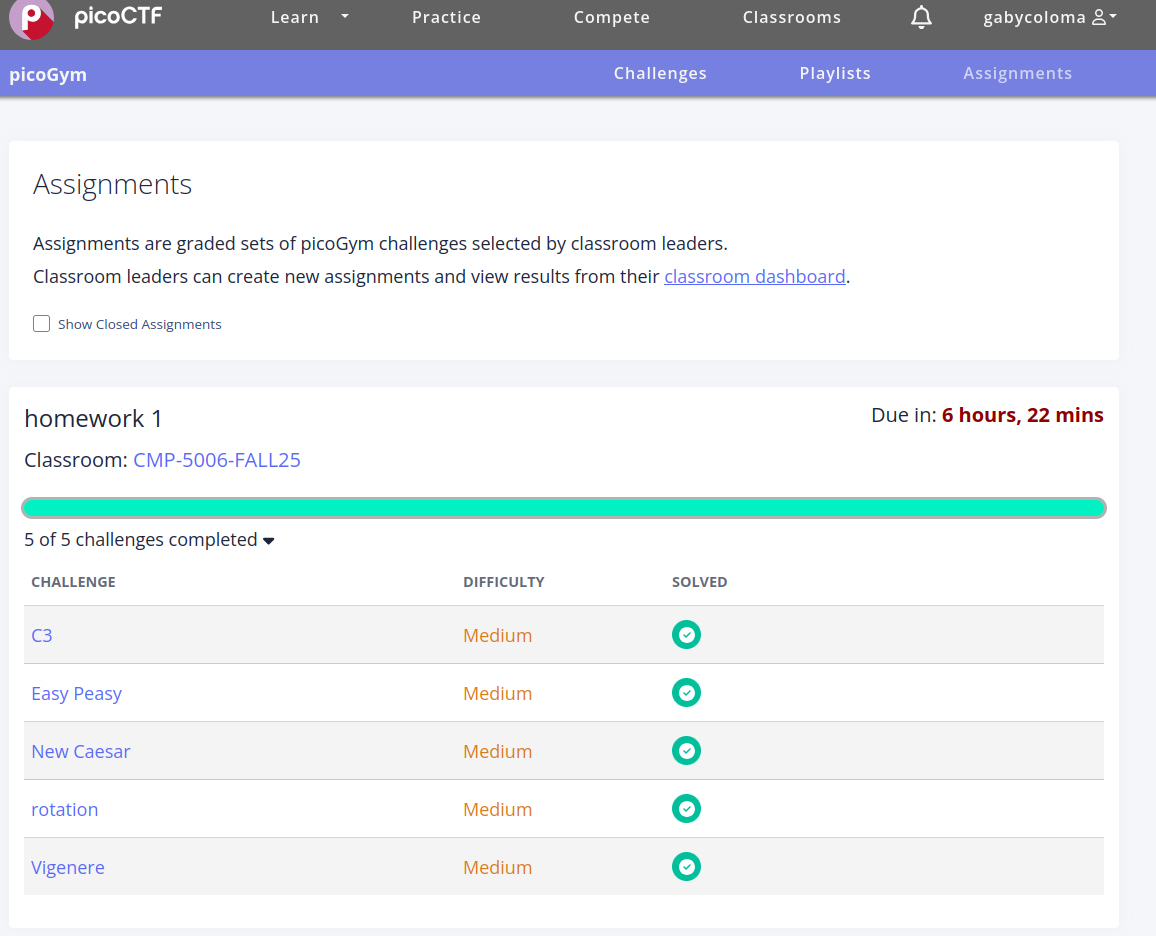


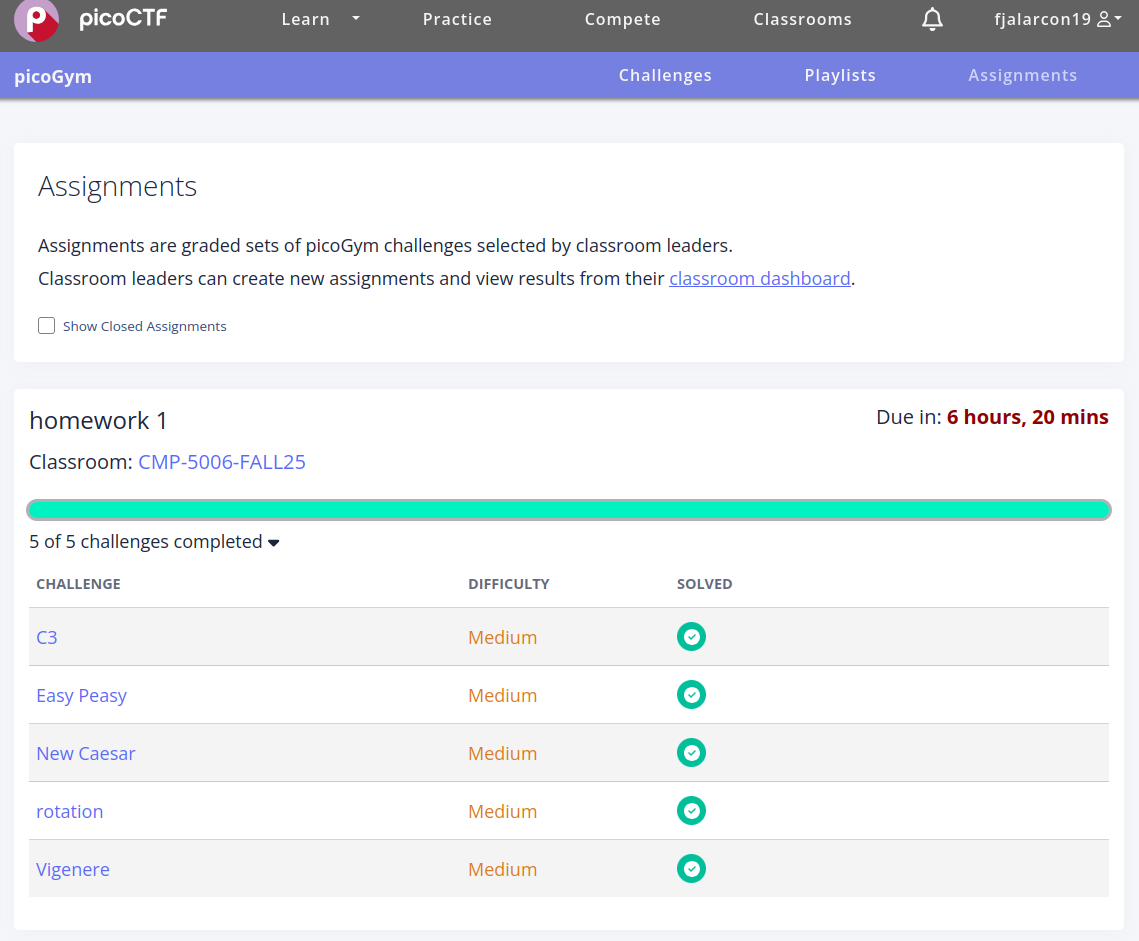